In [1]:
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt 

### Problema 1: Quer se estudar o número de erros de impressão de um livro. Para isso escolheu-se uma amostra de 50 páginas, encontrando-se o número de erros por página da tabela abaixo.

In [2]:
erros = [0, 1, 2, 3, 4]
frequencia = [25, 20, 3, 1, 1]

freq_table = pd.DataFrame(erros, columns=['Erros'])
freq_table['Frequencia'] = frequencia

freq_table

,Erros,Frequencia
0,0,25
1,1,20
2,2,3
3,3,1
4,4,1


In [3]:
paginas = []

for erro, freq in zip(erros, frequencia):
    paginas.extend([erro] * freq)

paginas = pd.DataFrame(paginas, columns=['QtdErrosXPgn'])
paginas

,QtdErrosXPgn
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#### Qual o número médio de erros por página?

In [4]:
#Sem o uso do pandas
media = paginas['QtdErrosXPgn'].sum()/len(paginas)

#Usando o pandas
mediaPd = paginas['QtdErrosXPgn'].mean()

print('Media:', media,' Media usando pandas: ', mediaPd)

Media: 0.66  Media usando pandas:  0.66


#### E o número mediano?

In [5]:
#Sem o uso do Pandas
if len(paginas)%2==0:
    i = int((len(paginas)/2)-1)
    o = i+1
    mediana = (paginas['QtdErrosXPgn'][i] + paginas['QtdErrosXPgn'][o])/ 2
else:
    i = floor(len(paginas['QtdErrosXPgn'])/2)
    mediana = paginas['QtdErrosXPgn'][i]

#Usando o pandas

medianaPd = paginas['QtdErrosXPgn'].median()

print('Mediana:', mediana,' Mediana usando pandas: ', medianaPd)

Mediana: 0.5  Mediana usando pandas:  0.5


#### Qual é o desvio padrão?

##### Sem o uso do pandas

In [6]:
def funcDesvio(valor, media):
    if valor > media:
        return round(valor - media, 3)
    else:
        return round(media - valor, 3) 
    
def funcQuadradoDesvios(valor):
    return round(valor**2, 3)

In [7]:
tamanho = len(paginas)
media = paginas['QtdErrosXPgn'].mean()

desvios = []
quadradoDesvios = []

#Pegando os desvios de cada elemento
for i in paginas['QtdErrosXPgn']:
    desvios.append(funcDesvio(i, media))

#Calculando o desvio medio a partir do desvio
desvioMedio = (sum(desvios))/tamanho

#Pegando o quadrado dos desvios de cada elemento
for i in desvios:
    quadradoDesvios.append(funcQuadradoDesvios(i))
    
#Calculando a variancia a partir do quadrado dos desvios
variancia = round((sum(quadradoDesvios))/tamanho, 3)

#Calculado o desvio Padrao a partir da variância
desvioPadrao = round(mt.sqrt(variancia),2)

print('Desvios:', desvios)
print()
print('Desvio Medio:', desvioMedio)
print()
print('Quadrado dos desvios', quadradoDesvios)
print()
print('Variancia:', variancia)
print()
print('Desvio Padrão:', desvioPadrao)

Desvios: [0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 1.34, 1.34, 1.34, 2.34, 3.34]

Desvio Medio: 0.66

Quadrado dos desvios [0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 1.796, 1.796, 1.796, 5.476, 11.156]

Variancia: 0.705

Desvio Padrão: 0.84


##### Com o pandas

In [8]:
#lista.mad() foi descontinuado
desvioMedio = paginas['QtdErrosXPgn']
desvioMedio = (desvioMedio-desvioMedio.mean()).abs().mean()
print('Desvio Médio:', desvioMedio)

#variância
variancia = round(paginas['QtdErrosXPgn'].var(), 3)
print("Variância:", variancia)

#desvio padrão
desvioPadrao = round(paginas['QtdErrosXPgn'].std(), 2)
print("Desvio Padrão:", desvioPadrao)


Desvio Médio: 0.66
Variância: 0.719
Desvio Padrão: 0.85


###### Acredito que da primeira maneira o calculo é mais preciso.

##### Acima achei melhor definir os desvios, desvio médio, quadrado dos desvio, variância e o desvio padrão, para mostra os outros pontos e o que deve ser feito até chegar DP

#### Faça uma representação gráfica para a distribuição.

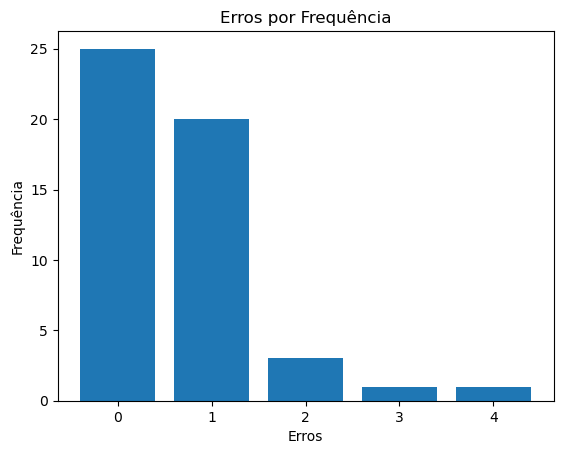

In [9]:
plt.bar(freq_table['Erros'], freq_table['Frequencia'])
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.title('Erros por Frequência')
plt.show()


#### Se o livro tem 500 páginas, qual o número total de erros esperado no livro?

In [10]:
valor = media * 500
print('O valor esperado é: ', valor)

O valor esperado é:  330.0


### Problema 2: As taxas de juros recebidas por 10 ações durante um certo período foram (medidas em porcentagem) 2,59; 2,64; 2,60; 2,62; 2,57; 2,55; 2,61; 2,50; 2,63; 2,64. Calcule a média, a mediana e o desvio padrão.

In [11]:
dados = [2.59, 2.64, 2.60, 2.62, 2.57, 2.55, 2.61, 2.50, 2.63, 2.64]

In [12]:
dados = pd.DataFrame(dados, columns=['TaxasJuros'])
dados

,TaxasJuros
0,2.59
1,2.64
2,2.60
3,2.62
4,2.57
5,2.55
6,2.61
7,2.50
8,2.63
9,2.64


In [13]:
media = round(dados['TaxasJuros'].mean(), 2)
print('Media:', media)

mediana = round(dados['TaxasJuros'].median(), 2)
print('Mediana:', mediana)

desvioPadrao = round(dados['TaxasJuros'].std(), 2)
print("Desvio Padrão:", desvioPadrao)

Media: 2.6
Mediana: 2.6
Desvio Padrão: 0.04


### Problema 3: Para facilitar um projeto de ampliação da rede de esgoto de uma certa região de uma cidade, as autoridades tomaram uma amostra de tamanho 50 dos 270 quarteirões que compõem a região, e foram encontrados os seguintes números de casas por quarteirão:
                                 2  2  3 10 13 14 15 15 16 16
                                18 18 20 21 22 22 23 24 25 25
                                26 27 29 29 30 32 36 42 44 45
                                45 46 48 52 58 59 61 61 61 65
                                66 66 68 75 78 80 89 90 92 97

In [14]:
dados = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16, 18, 18, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 29, 29, 30, 32, 36, 42, 44,
         45, 45, 46, 48, 52, 58, 59, 61, 61, 61, 65, 66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

#### Use cinco intervalos e construa um histograma.

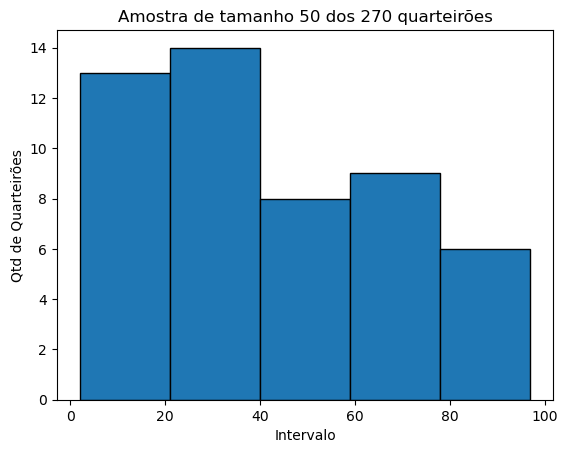

In [15]:
plt.hist(dados, bins=5, edgecolor='black')

plt.xlabel('Intervalo')
plt.ylabel('Qtd de Quarteirões')
plt.title('Amostra de tamanho 50 dos 270 quarteirões')


plt.show()


#### Determine uma medida de posição central e uma medida de dispersão.

In [16]:
#Utilizando Numpy

print('Medida de posição central')
mediana = np.median(dados)
print('Mediana:', mediana)

print()

print('medida de dispersão')
desvioPadrao = round(np.std(dados),2)
print('Desvio Padrão:', desvioPadrao)

Medida de posição central
Mediana: 31.0

medida de dispersão
Desvio Padrão: 25.81


### Problema 6: Numa pesquisa realizada com 100 famílias, levantaram-se as seguintes informações:

In [17]:
numeroFilhos = [0, 1, 2, 3, 4, 5, '+ q 5']
freqFamilia = [17, 20, 28, 19, 7, 4, 5]

pesquisa = pd.DataFrame(numeroFilhos, columns=['NumeroFilhos'])
pesquisa['FreqFamilia'] = freqFamilia

pesquisa

,NumeroFilhos,FreqFamilia
0,0,17
1,1,20
2,2,28
3,3,19
4,4,7
5,5,4
6,+ q 5,5


In [18]:
#Mudando elemento da lista
numeroFilhos = [6 if x == '+ q 5' else x for x in numeroFilhos]

familias = []

for numeroFilhos, freqFamilia in zip(numeroFilhos, freqFamilia):
    familias.extend([numeroFilhos] * freqFamilia)

In [19]:
len(familias)

100

#### Qual a mediana do número de filhos?

In [20]:
mediana = np.median(familias)

print("A mediana é:", mediana)

A mediana é: 2.0


#### E a moda?

In [21]:
# Apenas de olhar tabela é possivel identificar que é a quantidade de 2 filhos que mais acontece.
pesquisa

,NumeroFilhos,FreqFamilia
0,0,17
1,1,20
2,2,28
3,3,19
4,4,7
5,5,4
6,+ q 5,5


In [22]:
# Apenas para registrar outra maneira
moda = np.argmax(np.bincount(familias))

print("A moda é:", moda)

A moda é: 2


### Problema 7: Obtenha o esquema dos cinco números para os dados do Problema 3. Calcule o intervalo interquartil e as dispersões inferior e superior. Baseado nessas medidas, verifique se a forma da distribuição dos dados é normal.

In [23]:
dados = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16, 18, 18, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 29, 29, 30, 32, 36, 42, 44,
         45, 45, 46, 48, 52, 58, 59, 61, 61, 61, 65, 66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

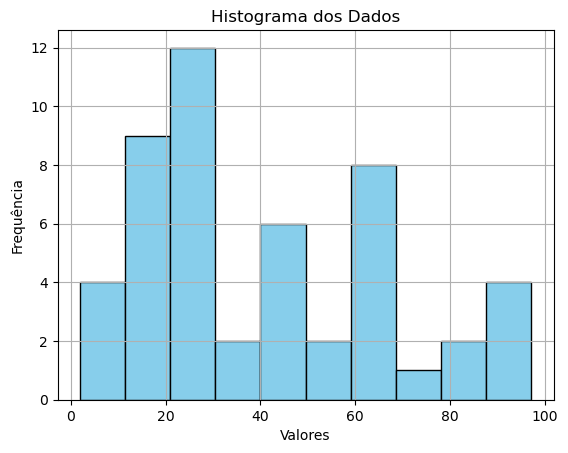

In [24]:
plt.hist(dados, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados')
plt.grid(True)
plt.show()

Nesse histograma já possível notar que não existe uma distribuição normal.

##### Sem o uso de numpy

In [25]:

#ordena os dados
dados.sort()

#Q1
Q1 = (len(dados)+1)/4

#arredondar para cima
Q1= mt.ceil(Q1)

#-1 pois começa do valor zero
dadoQ1 = dados[Q1-1]


#Q2 ou mediana
if len(dados)%2==0:
    i = int((len(dados)/2)-1)
    o = i+1
    dadoQ2 = (dados[i] + dados[o])/ 2
else:
    i = floor(len(dados)/2)
    dadoQ2 = dados[i]

#Q3
Q3 =(3*(len(dados)+1))/4
Q3= mt.ceil(Q3)

dadoQ3 = dados[Q3-1]

#Intervalo interquartil
IQR = dadoQ3 - dadoQ1

#Distribuições pegar mediana - primeiro valor da lista e ultimo valor da lista - mediana
dispersaoInferior = dadoQ2 - dados[0]
dispersaoSuperior = dados[-1] - dadoQ2

print('Q1:', dadoQ1)
print('Q2 ou mediana:', dadoQ2)
print('Q3:', dadoQ3)
print('IQR:', IQR)
print('Dispersao Inferior:', dispersaoInferior)
print('Dispersao Superior:', dispersaoSuperior)

Q1: 20
Q2 ou mediana: 31.0
Q3: 61
IQR: 41
Dispersao Inferior: 29.0
Dispersao Superior: 66.0


##### Com numpy

In [26]:
dados.sort()

dadoQ1 = np.percentile(dados, 25)
dadoQ2 = np.median(dados)
dadoQ3 = np.percentile(dados, 75)

IQR = dadoQ3 - dadoQ1

dispersaoInferior = dadoQ2 - dados[0]
dispersaoSuperior = dados[-1] - dadoQ2

print('Q1:', dadoQ1)
print('Q2 ou mediana:', dadoQ2)
print('Q3:', dadoQ3)
print("IQR:", IQR)
print("Dispersão Inferior:", dispersaoInferior)
print("Dispersão Superior:", dispersaoSuperior)


Q1: 20.25
Q2 ou mediana: 31.0
Q3: 61.0
IQR: 40.75
Dispersão Inferior: 29.0
Dispersão Superior: 66.0


###### Após conseguir os dados necessários é apenas avaliar as seguintes condições:
(a) q2 – x(1) ≈ x(n) – q2: significa que a diferença entre o segundo quartil e o menor valor é aproximadamente igual à diferença entre o maior valor e o segundo quartil. Isso sugere simetria na distribuição.

(b) q2 – q1 ≈ q3 – q2: Indica que a diferença entre o segundo quartil e o primeiro quartil é aproximadamente igual à diferença entre o terceiro quartil e o segundo quartil, o que também sugere simetria.

(c) q1 – x(1) ≈ x(n) – q3: Essa condição também compara as dispersões inferior e superior, sugerindo simetria se forem aproximadamente iguais.

(d) Distâncias entre mediana e q1 , q3 menores do que distâncias entre os extremos e q1 , q3: Essa opção ressalta que as distâncias entre a mediana e os quartis devem ser menores do que as distâncias entre os extremos (o menor e o maior valor) e os quartis.

In [27]:
#Condição a)
print('(a) É possível ver que a disperção inferior = ', dispersaoInferior, 'e a superior =', dispersaoSuperior,
      ', não são aproximadamente iguais.')
print()
#Condição b)
print('(b) Q2 - Q1 = ', dadoQ2 - dadoQ1, 'e Q3 - Q2 =', dadoQ3 - dadoQ2, ', não são aproximadamente iguais.')
print()
#Condição c)
print('(c) Q1 - primeiro valor:', dadoQ1,'-', dados[0],'=', dadoQ1-dados[0], 'e Q3 - ultimo valor =', dados[-1],'-', dadoQ3,'=', dados[-1]-dadoQ3,
     ', não são aproximadamente iguais')
print()
#Condição D
print('(d) A distância, ou seja, Mediana - Q1 =', dadoQ2 - dadoQ1, 'e Q3 - Mediana=', dadoQ3 - dadoQ2, 
     ', devem ser menores que ultimo valor - primeiro valor =', dados[-1]-dados[0], 'e Q3 - Q1 =', dadoQ3 - dadoQ1)
print()
print('Apenas a opção (d) é cumprida então é possível dizer que esses dados não possui distribuição normal')

(a) É possível ver que a disperção inferior =  29.0 e a superior = 66.0 , não são aproximadamente iguais.

(b) Q2 - Q1 =  10.75 e Q3 - Q2 = 30.0 , não são aproximadamente iguais.

(c) Q1 - primeiro valor: 20.25 - 2 = 18.25 e Q3 - ultimo valor = 97 - 61.0 = 36.0 , não são aproximadamente iguais

(d) A distância, ou seja, Mediana - Q1 = 10.75 e Q3 - Mediana= 30.0 , devem ser menores que ultimo valor - primeiro valor = 95 e Q3 - Q1 = 40.75

Apenas a opção (d) é cumprida então é possível dizer que esses dados não possui distribuição normal


### Problema 8: Refaça o problema anterior, utilizando desta vez os dados do Problema 5(AnosIdade) do Capítulo 2.

In [28]:
dados = pd.read_csv("Dados/EmpregadosCompanhiaMB.csv", sep=";")

dados.head()

,N,EstadoCivil,GrauInstrucao,Nfilhos,Salario(xSalMin),AnosIdade,MesesIdade,RegiaoProcedencia
0,1,solteiro,ensino fundamental,0,4,26,3,interior
1,2,casado,ensino fundamental,1,"4,56",32,10,capital
2,3,casado,ensino fundamental,2,"5,25",36,5,capital
3,4,solteiro,ensino médio,0,"5,73",20,10,outra
4,5,solteiro,ensino fundamental,0,"6,26",40,7,outra


In [29]:
idades = dados['AnosIdade'].tolist()

len(idades)

36

In [30]:
idades.sort()

Q1 = np.percentile(idades, 25)
Q2 = np.median(idades)
Q3 = np.percentile(idades, 75)

IQR = Q3 - Q1

dispersaoInferior = Q2 - idades[0]
dispersaoSuperior = idades[-1] - Q2

print('Q1:', Q1)
print('Q2 ou mediana:', Q2)
print('Q3:', Q3)
print("IQR:", IQR)
print("Dispersão Inferior:", dispersaoInferior)
print("Dispersão Superior:", dispersaoSuperior)

Q1: 30.0
Q2 ou mediana: 34.5
Q3: 40.0
IQR: 10.0
Dispersão Inferior: 14.5
Dispersão Superior: 13.5


In [31]:
#Condição a)
print('(a) É possível ver que a disperção inferior = ', dispersaoInferior, 'e a superior =', dispersaoSuperior,
      ', são aproximadamente iguais.')
print()
#Condição b)
print('(b) Q2 - Q1 = ', Q2 - Q1, 'e Q3 - Q2 =', Q3 - Q2, ', são aproximadamente iguais.')
print()
#Condição c)
print('(c) Q1 - primeiro valor:', Q1,'-', idades[0],'=', Q1-idades[0], 'e Q3 - ultimo valor =', idades[-1],'-', Q3,'=', idades[-1]-Q3,
     ', são aproximadamente iguais')
print()
#Condição D
print('(d) A distância, ou seja, Mediana - Q1 =', Q2 - Q1, 'e Q3 - Mediana=', Q3 - Q2, 
     ', devem ser menores que ultimo valor - primeiro valor=', idades[-1]-idades[0], 'e Q3 - Q1 =', Q3 - Q1)
print()
print('Todas as afirmações são cumpridas então é possível dizer que a distribuição do dados é normal')

(a) É possível ver que a disperção inferior =  14.5 e a superior = 13.5 , são aproximadamente iguais.

(b) Q2 - Q1 =  4.5 e Q3 - Q2 = 5.5 , são aproximadamente iguais.

(c) Q1 - primeiro valor: 30.0 - 20 = 10.0 e Q3 - ultimo valor = 48 - 40.0 = 8.0 , são aproximadamente iguais

(d) A distância, ou seja, Mediana - Q1 = 4.5 e Q3 - Mediana= 5.5 , devem ser menores que ultimo valor - primeiro valor= 28 e Q3 - Q1 = 10.0

Todas as afirmações são cumpridas então é possível dizer que a distribuição do dados é normal


#### Elaborando um histograma é possivel ver essa distribuição normal

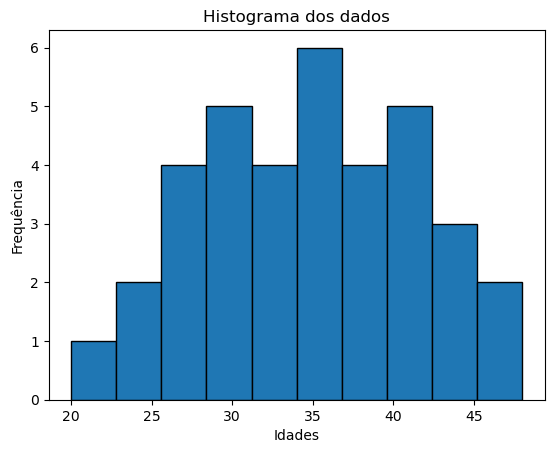

In [32]:
plt.hist(idades, bins=10, edgecolor='black')

plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Histograma dos dados')

plt.show()


### Problema 9: Obter os três quartis, q(0,1) e q(0,90) para os dados do Problema 3.

In [33]:
dados = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16, 18, 18, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 29, 29, 30, 32, 36, 42, 44,
         45, 45, 46, 48, 52, 58, 59, 61, 61, 61, 65, 66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

len(dados)

50

In [34]:
dados.sort()

Q1 = np.percentile(dados, 25)
Q2 = np.median(dados)
Q3 = np.percentile(dados, 75)

Q10= np.percentile(dados, 10)
Q90= np.percentile(dados, 90)

print('10%:', Q10)
print('25%:', Q1)
print('50%:', Q2)
print('75%:', Q3)
print('90%:', Q90)

10%: 13.9
25%: 20.25
50%: 31.0
75%: 61.0
90%: 78.2


### Problema 10: Para a variável população urbana do CD-Brasil, obtenha q(0,10), q(0,25), q(0,50), q(0,75), q(0,80) e q(0,95).

In [35]:
dados = pd.read_csv("Dados/CD-Brasil.csv", sep=";")

dados['Populacao']= dados['Populacao'].str.replace('.','')
dados['Populacao'] = dados['Populacao'].astype(int)

dados.head()

,Regiao,Estado,Superficie,Populacao,Densidade
0,Norte,RO,"237.576,167",1453756,"6,12"
1,Norte,AC,"164.165,250",653385,"3,98"
2,Norte,AM,"1.559.161,810",3221940,"2,07"
3,Norte,RR,"224.298,980",395725,"1,76"
4,Norte,PA,"1.247.689,515",7065573,"5,66"


In [36]:
populacaoUrbana = dados['Populacao'].tolist()
len(populacaoUrbana)

27

In [37]:
populacaoUrbana.sort()

Q1 = np.percentile(populacaoUrbana, 25)
Q2 = np.percentile(populacaoUrbana, 50)
Q3 = np.percentile(populacaoUrbana, 75)
Q80 = round(np.percentile(populacaoUrbana, 80), 2)
Q95 = round(np.percentile(populacaoUrbana, 95), 2)

print('25%:', Q1)
print('50%:', Q2)
print('75%:', Q3)
print('80%:', Q80)
print('95%:', Q95)

25%: 2360858.0
50%: 3351669.0
75%: 8335944.0
80%: 9924930.0
95%: 18117608.1


### Problema 11: Construa o box plot para os dados do Exemplo 2.3, Capítulo 2. O que você pode concluir a respeito da distribuição?

In [38]:
dados = pd.read_csv('Dados/EmpregadosCompanhiaMB.csv', sep=";")

dados['Salario(xSalMin)'] = dados['Salario(xSalMin)'].str.replace(',', '.').astype(float)

dados.head()

,N,EstadoCivil,GrauInstrucao,Nfilhos,Salario(xSalMin),AnosIdade,MesesIdade,RegiaoProcedencia
0,1,solteiro,ensino fundamental,0,4.00,26,3,interior
1,2,casado,ensino fundamental,1,4.56,32,10,capital
2,3,casado,ensino fundamental,2,5.25,36,5,capital
3,4,solteiro,ensino médio,0,5.73,20,10,outra
4,5,solteiro,ensino fundamental,0,6.26,40,7,outra


In [39]:
salarios = dados['Salario(xSalMin)'].tolist()
len(salarios)

36

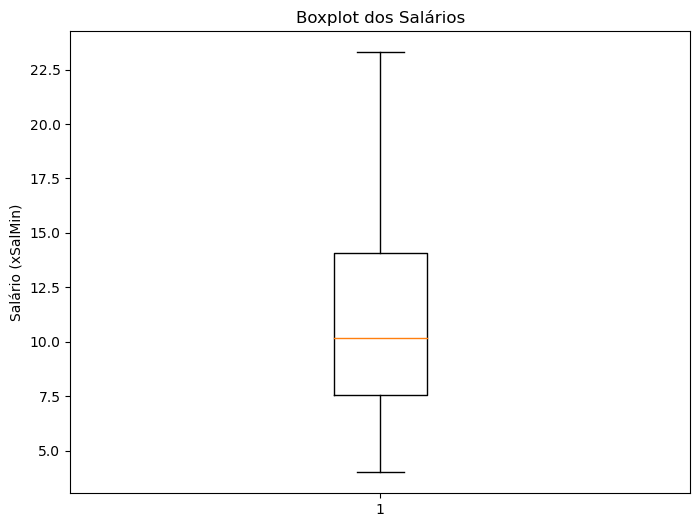

In [40]:
salarios.sort()

plt.figure(figsize=(8, 6))
plt.boxplot(salarios)
plt.title('Boxplot dos Salários')
plt.ylabel('Salário (xSalMin)')
plt.show()

É possível notar uma assimetria a direita dos dados e sem valores exteriores (outliers).

### Problema 12: Refaça a questão anterior com os dados do Problema 3 deste capítulo.

In [41]:
dados = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16, 18, 18, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 29, 29, 30, 32, 36, 42, 44,
         45, 45, 46, 48, 52, 58, 59, 61, 61, 61, 65, 66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

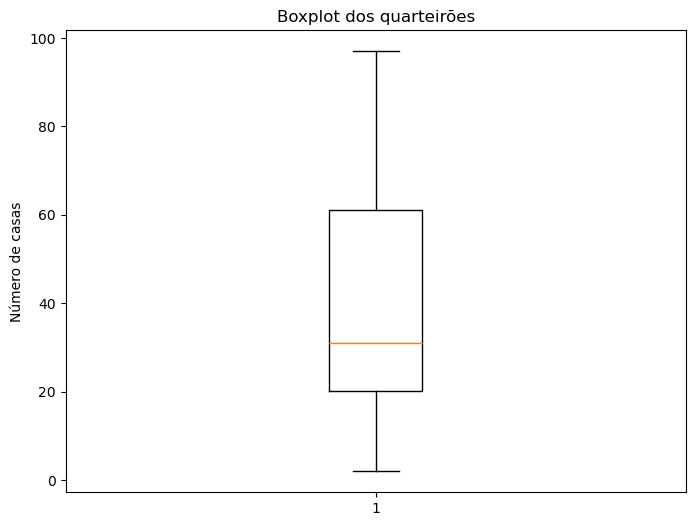

In [42]:
dados.sort()

plt.figure(figsize=(8, 6))
plt.boxplot(dados)
plt.title('Boxplot dos quarteirões')
plt.ylabel('Número de casas')
plt.show()

É possível notar uma assimetria a direita dos dados e sem valores exteriores (outliers).

### Problema 13: Faça um box plot para o Problema 10. Comente sobre a simetria, caudas e presença de valores atípicos

In [43]:
dados = pd.read_csv("Dados/CD-Brasil.csv", sep=";")
dados['Populacao']= dados['Populacao'].str.replace('.','').astype(int)
dados.head()

,Regiao,Estado,Superficie,Populacao,Densidade
0,Norte,RO,"237.576,167",1453756,"6,12"
1,Norte,AC,"164.165,250",653385,"3,98"
2,Norte,AM,"1.559.161,810",3221940,"2,07"
3,Norte,RR,"224.298,980",395725,"1,76"
4,Norte,PA,"1.247.689,515",7065573,"5,66"


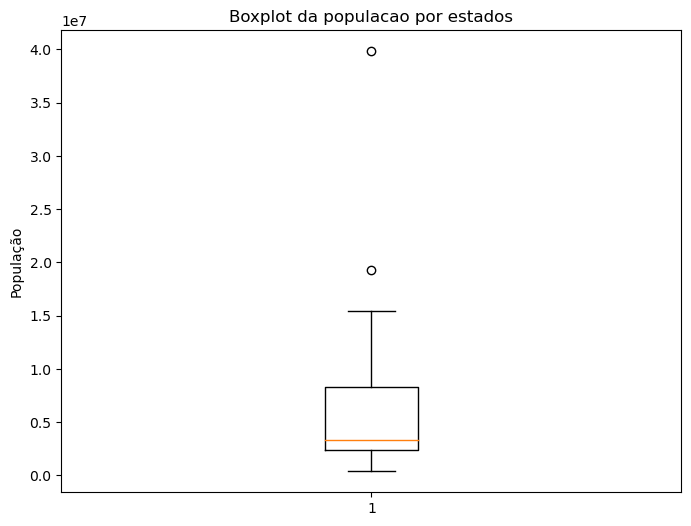

In [44]:
populacao  = dados['Populacao'].tolist()

populacao.sort()

plt.figure(figsize=(8, 6))
plt.boxplot(populacao)
plt.title('Boxplot da populacao por estados')
plt.ylabel('População')
plt.show()

Existe aqui uma simetria a a direita(distância de Q3-Q2 > Q2-Q1); sobre as caudas, é mostrado que existem valores bem altos se comprados com a maioria dos dados. Também existe aqui valores exteriores, que não devem ser considerados outliers pois é um dado de uma população que é realmente alta, não um provável erro.